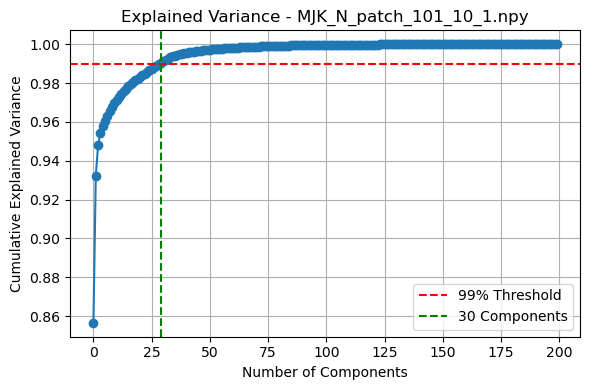

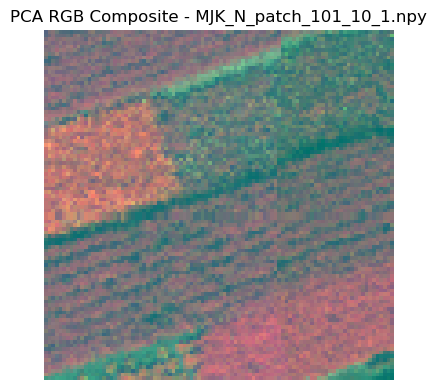

PCA Reconstruction RMSE: 0.009102
PCA transformed data shape: (96, 96, 30)


In [14]:
import numpy as np
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


file_path = r'C:\Users\raaya\Downloads\Test\rs\MJK_N_patch_101_10_1.npy'
output_dir = r'C:\Users\raaya\OneDrive\Desktop\Hyperspectular\Assignment'
explained_threshold = 0.99

os.makedirs(output_dir, exist_ok=True)

data = np.load(file_path)  
h, w, b = data.shape
data_reshaped = data.reshape(-1, b) 

pca_full = PCA()
pca_full.fit(data_reshaped)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
n_components = np.searchsorted(cumulative_variance, explained_threshold) + 1

pca = PCA(n_components=n_components)
transformed = pca.fit_transform(data_reshaped)
transformed_reshaped = transformed.reshape(h, w, n_components)
filename = os.path.basename(file_path)
save_path = os.path.join(output_dir, filename)
np.save(save_path, transformed_reshaped)


plt.figure(figsize=(6, 4))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=explained_threshold, color='r', linestyle='--', label=f'{explained_threshold*100:.0f}% Threshold')
plt.axvline(x=n_components-1, color='g', linestyle='--', label=f'{n_components} Components')
plt.title(f'Explained Variance - {filename}')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

if n_components >= 3:
    rgb = transformed_reshaped[:, :, :3]
    rgb_norm = (rgb - rgb.min()) / (rgb.max() - rgb.min())  

    plt.figure(figsize=(4, 4))
    plt.imshow(rgb_norm)
    plt.title(f'PCA RGB Composite - {filename}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
reconstructed = pca.inverse_transform(transformed)  
original_spectra = data_reshaped                    

rmse = np.sqrt(np.mean((original_spectra - reconstructed) ** 2))
print(f"PCA Reconstruction RMSE: {rmse:.6f}")
print(f"PCA transformed data shape: {transformed_reshaped.shape}")


Running 10000 pixel purity iterations...  0.Running 10000 pixel purity iterations...  0.Running 10000 pixel purity iterations...  0.Running 10000 pixel purity iterations...  0.Running 10000 pixel purity iterations...  0.Running 10000 pixel purity iterations...  0.Running 10000 pixel purity iterations...  0.Running 10000 pixel purity iterations...  0.Running 10000 pixel purity iterations...  0.Running 10000 pixel purity iterations...  0.Running 10000 pixel purity iterations...  1.Running 10000 pixel purity iterations...  1.Running 10000 pixel purity iterations...  1.Running 10000 pixel purity iterations...  1.Running 10000 pixel purity iterations...  1.Running 10000 pixel purity iterations...  1.Running 10000 pixel purity iterations...  1.Running 10000 pixel purity iterations...  1.Running 10000 pixel purity iterations...  1.Running 10000 pixel purity iterations...  1.Running 10000 pixel purity iterations...  2.Running 10000 pixel purity iterations...  2.Running 10000 pixel purity itera

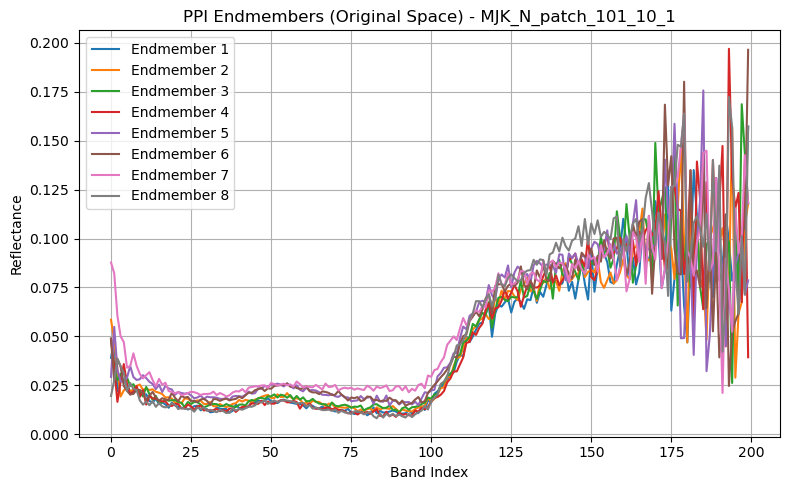

(9216, 5)


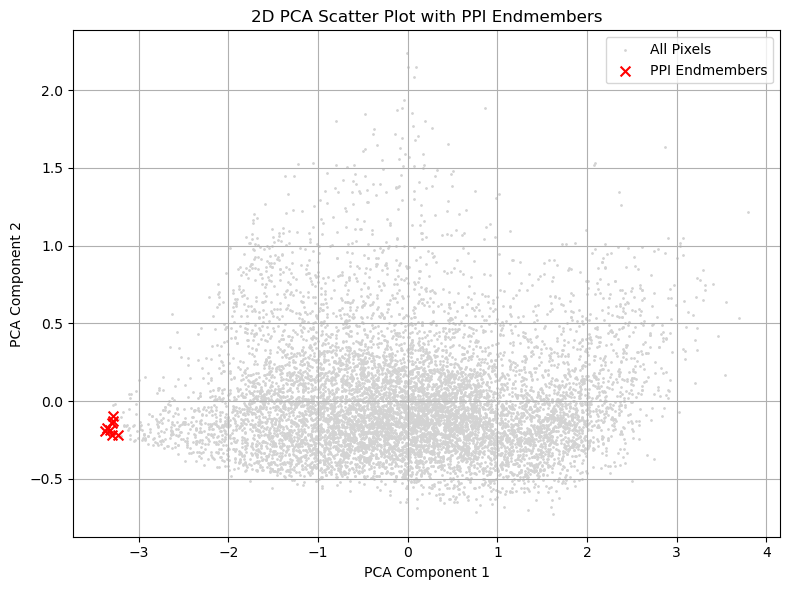

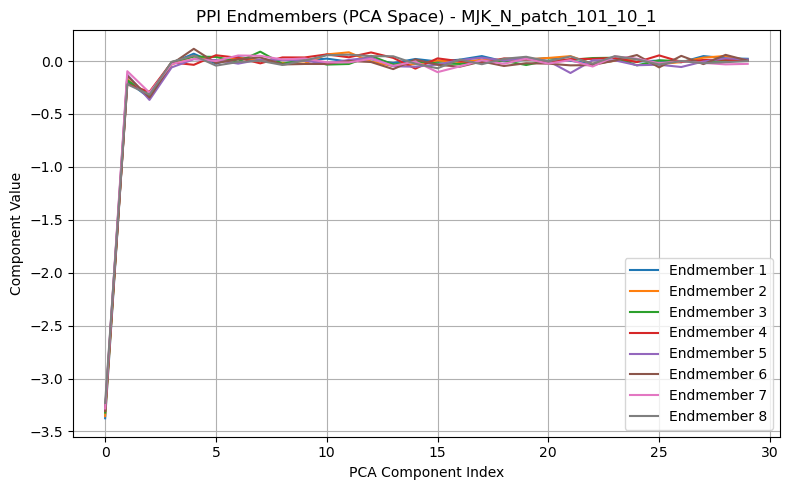

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from spectral.algorithms import ppi

pca_file_path = r'C:\Users\raaya\OneDrive\Desktop\Hyperspectular\Assignment\MJK_N_patch_101_10_1.npy'
original_file_path = r'C:\Users\raaya\Downloads\Test\rs\MJK_N_patch_101_10_1.npy'
ppi_output_dir = r'C:\Users\raaya\OneDrive\Desktop\Hyperspectular\Assignment\ppi_endmembers'

n_endmembers = 8
num_projections = 10000
ppi_threshold = 0.12

os.makedirs(ppi_output_dir, exist_ok=True)

pca_data = np.load(pca_file_path)     
original_data = np.load(original_file_path)     
h, w, c_pca = pca_data.shape
_, _, c_original = original_data.shape

ppi_counts = ppi(pca_data, niters=num_projections, threshold=ppi_threshold)
flat_indices = np.argsort(ppi_counts.ravel())[::-1][:n_endmembers]
row_indices, col_indices = np.unravel_index(flat_indices, (h, w))

ppi_endmembers_pca = pca_data[row_indices, col_indices, :]            
ppi_endmembers_original = original_data[row_indices, col_indices, :]  

filename_base = os.path.splitext(os.path.basename(pca_file_path))[0]
save_path = os.path.join(ppi_output_dir, f"{filename_base}_ppi_endmembers_original.npy")
save_path_pca = os.path.join(ppi_output_dir, f"{filename_base}_ppi_endmembers_pca.npy")
np.save(save_path, ppi_endmembers_original)
np.save(save_path_pca,ppi_endmembers_pca)


np.save(os.path.join(ppi_output_dir, f"{filename_base}_ppi_endmember_rows.npy"), row_indices)
np.save(os.path.join(ppi_output_dir, f"{filename_base}_ppi_endmember_cols.npy"), col_indices)

print(f"{filename_base}: Extracted {ppi_endmembers_original.shape[0]} endmembers from original image.")

plt.figure(figsize=(8, 5))
for i, spectrum in enumerate(ppi_endmembers_original):
    plt.plot(spectrum, label=f'Endmember {i+1}')
plt.title(f'PPI Endmembers (Original Space) - {filename_base}')
plt.xlabel('Band Index')
plt.ylabel('Reflectance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

pixels_2d = pca_data.reshape(-1, c_pca)[:, :5]  
endmember_flat_indices = row_indices * w + col_indices
print(pixels_2d.shape)
plt.figure(figsize=(8, 6))
plt.scatter(pixels_2d[:, 0], pixels_2d[:, 1], s=1, color='lightgray', label='All Pixels')
plt.scatter(pixels_2d[endmember_flat_indices, 0], pixels_2d[endmember_flat_indices, 1],
            color='red', s=50, marker='x', label='PPI Endmembers')
plt.title('2D PCA Scatter Plot with PPI Endmembers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
for i, spectrum in enumerate(ppi_endmembers_pca):
    plt.plot(spectrum, label=f'Endmember {i+1}')
plt.title(f'PPI Endmembers (PCA Space) - {filename_base}')
plt.xlabel('PCA Component Index')
plt.ylabel('Component Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




MJK_N_patch_101_10_1: Extracted 8 endmembers via VCA and saved.


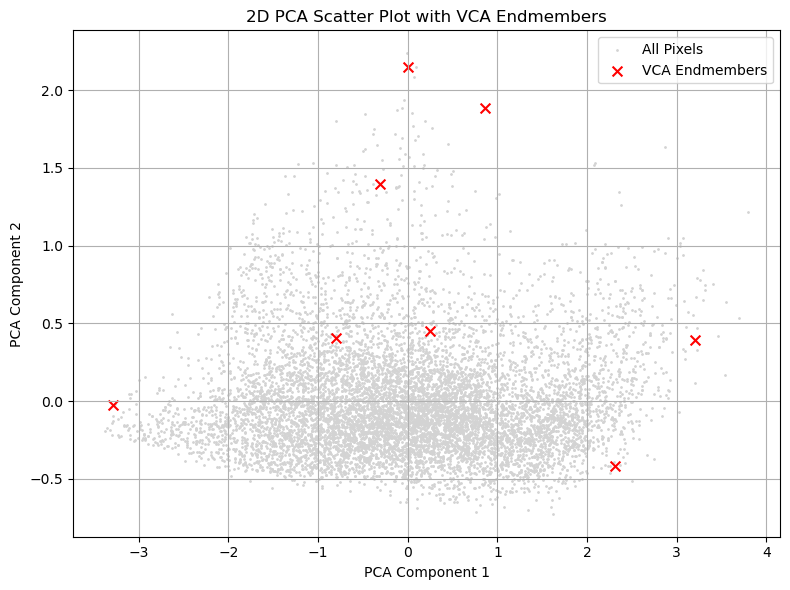

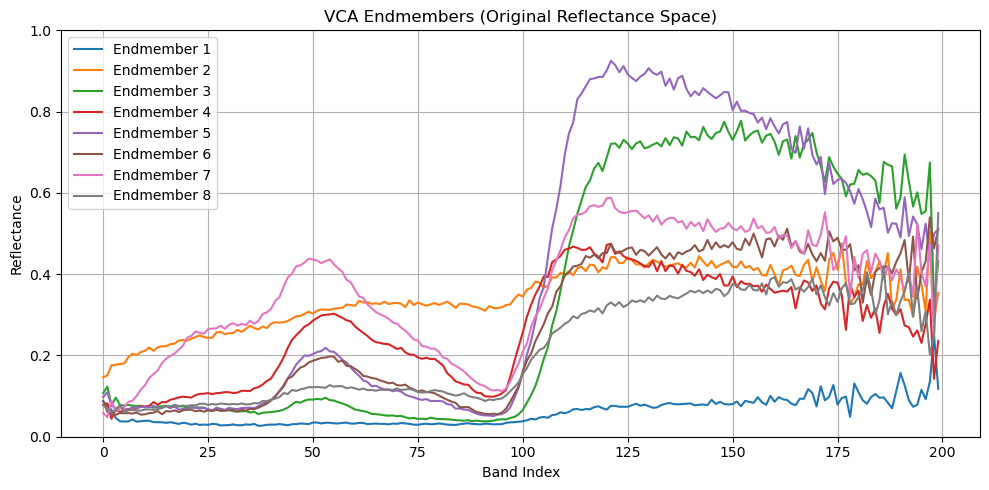

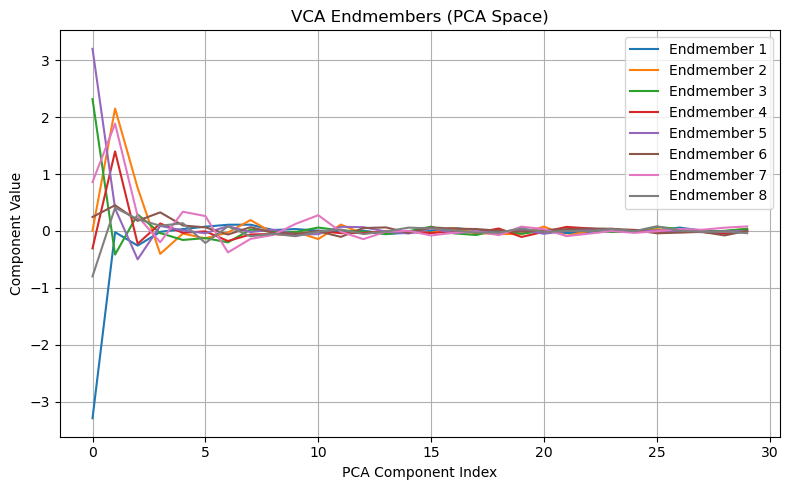

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

def vca(Y, num_endmembers):
    L, N = Y.shape
    Ud, _, _ = np.linalg.svd(np.dot(Y, Y.T) / N)
    Ud = Ud[:, :num_endmembers]
    x_p = np.dot(Ud.T, Y)
    x_p = np.vstack((x_p, np.ones((1, N))))  

    E = np.zeros((L, num_endmembers))      
    A = np.zeros((num_endmembers + 1, num_endmembers)) 

    for i in range(num_endmembers):
        w = np.random.randn(num_endmembers + 1)
        f = w - np.dot(A, np.dot(np.linalg.pinv(A), w))
        f = f / np.linalg.norm(f)
        v = np.dot(f.T, x_p)
        ind = np.argmax(np.abs(v))
        E[:, i] = Y[:, ind]
        A[:, i] = x_p[:, ind]
    return E


pca_file_path = r'C:\Users\raaya\OneDrive\Desktop\Hyperspectular\Assignment\MJK_N_patch_101_10_1.npy'
original_file_path = r'C:\Users\raaya\Downloads\Test\rs\MJK_N_patch_101_10_1.npy'
vca_output_dir = r'C:\Users\raaya\OneDrive\Desktop\Hyperspectular\Assignment\vca_endmember'
os.makedirs(vca_output_dir, exist_ok=True)

num_endmembers = 8

pca_data = np.load(pca_file_path)           
original_data = np.load(original_file_path) 
h, w, c_pca = pca_data.shape
_, _, c_original = original_data.shape

Y = pca_data.reshape(-1, c_pca).T           

endmembers_pca = vca(Y, num_endmembers)    

filename_base = os.path.splitext(os.path.basename(pca_file_path))[0]
save_path_pca = os.path.join(vca_output_dir, f'{filename_base}_vca_endmembers_pca.npy')
np.save(save_path_pca, endmembers_pca.T)    

pixels = pca_data.reshape(-1, c_pca)        
vca_pixel_indices = []
for i in range(num_endmembers):
    em = endmembers_pca[:, i]
    dists = np.linalg.norm(pixels - em, axis=1)
    idx = np.argmin(dists)
    vca_pixel_indices.append(idx)

vca_pixel_indices = np.array(vca_pixel_indices)
vca_row_indices, vca_col_indices = np.unravel_index(vca_pixel_indices, (h, w))

endmembers_original = original_data[vca_row_indices, vca_col_indices, :]  
save_path_original = os.path.join(vca_output_dir, f'{filename_base}_vca_endmembers_original.npy')
np.save(save_path_original, endmembers_original)
# Save endmember pixel locations (row and column indices)
np.save(os.path.join(vca_output_dir, f'{filename_base}_vca_endmember_rows.npy'), vca_row_indices)
np.save(os.path.join(vca_output_dir, f'{filename_base}_vca_endmember_cols.npy'), vca_col_indices)

print(f"{filename_base}: Extracted {num_endmembers} endmembers via VCA and saved.")


plt.figure(figsize=(8, 6))
plt.scatter(pixels[:, 0], pixels[:, 1], s=1, color='lightgray', label='All Pixels')
plt.scatter(pixels[vca_pixel_indices, 0], pixels[vca_pixel_indices, 1],
            color='red', s=50, marker='x', label='VCA Endmembers')
plt.title('2D PCA Scatter Plot with VCA Endmembers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
for i, spectrum in enumerate(endmembers_original):
    plt.plot(spectrum, label=f'Endmember {i+1}')
plt.title('VCA Endmembers (Original Reflectance Space)')
plt.xlabel('Band Index')
plt.ylabel('Reflectance')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
for i in range(num_endmembers):
    plt.plot(endmembers_pca[:, i], label=f'Endmember {i+1}')
plt.title('VCA Endmembers (PCA Space)')
plt.xlabel('PCA Component Index')
plt.ylabel('Component Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


MJK_N_patch_101_10_1: Extracted 8 endmembers via N-FINDR


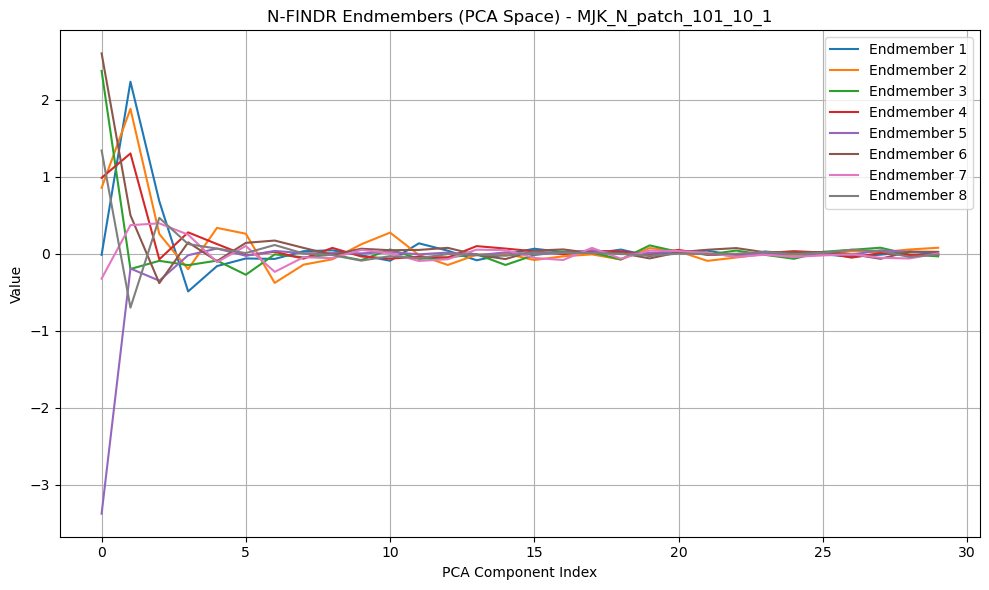

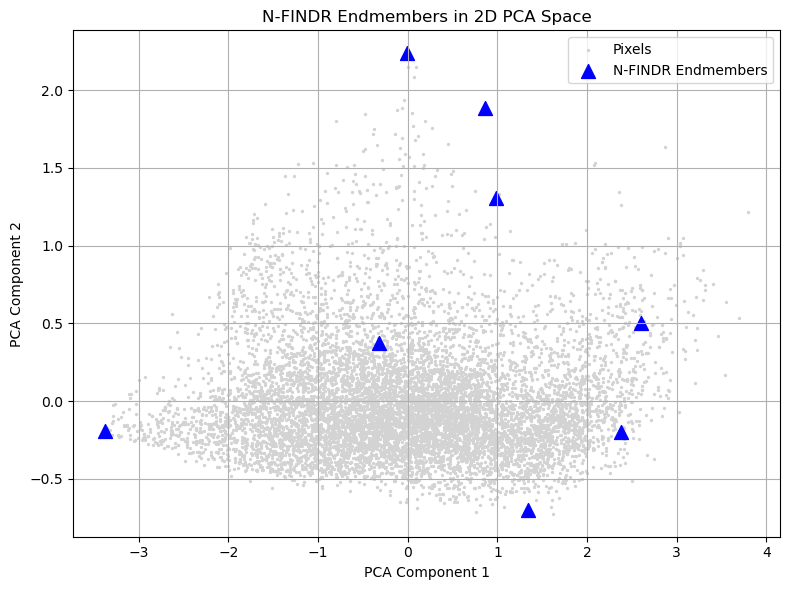

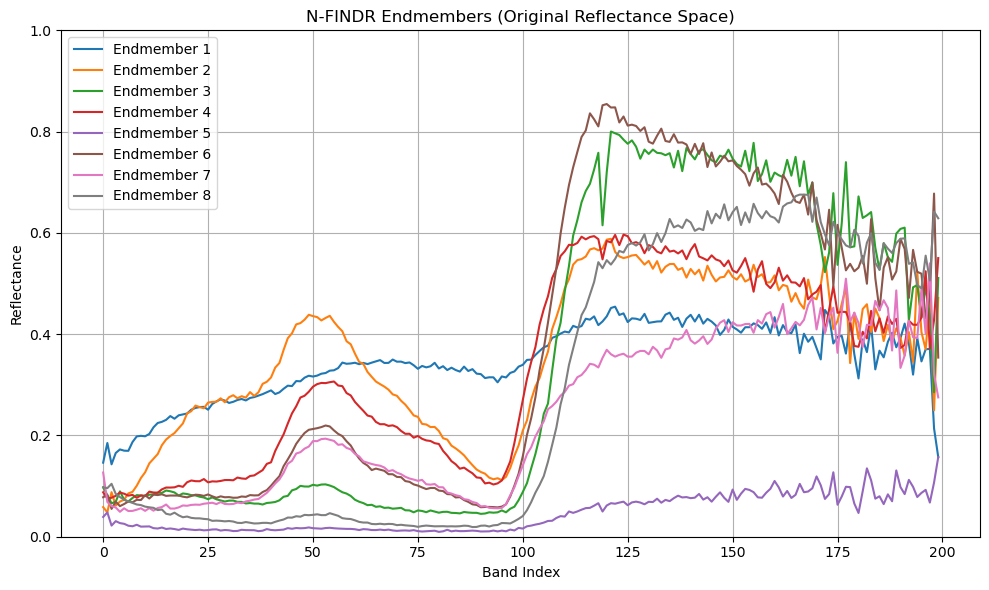

In [3]:
import numpy as np
import os
import math
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def compute_simplex_volume(matrix):
    matrix_centered = matrix - matrix[:, [0]]
    try:
        Q, R = np.linalg.qr(matrix_centered[:, 1:].T)
        volume = np.abs(np.prod(np.diag(R))) / math.factorial(matrix.shape[1] - 1)
    except np.linalg.LinAlgError:
        volume = 0
    return volume

def nfindr(data, num_endmembers, max_iter=5):
    num_components, num_pixels = data.shape
    indices = np.random.choice(num_pixels, num_endmembers, replace=False)
    endmembers = data[:, indices]

    for _ in range(max_iter):
        for i in range(num_endmembers):
            for j in range(num_pixels):
                test_endmembers = endmembers.copy()
                test_endmembers[:, i] = data[:, j]
                if compute_simplex_volume(test_endmembers) > compute_simplex_volume(endmembers):
                    endmembers[:, i] = data[:, j]
    return endmembers

pca_file_path = r'C:\Users\raaya\OneDrive\Desktop\Hyperspectular\Assignment\MJK_N_patch_101_10_1.npy'
original_file_path = r'C:\Users\raaya\Downloads\Test\rs\MJK_N_patch_101_10_1.npy'
output_dir = r'C:\Users\raaya\OneDrive\Desktop\Hyperspectular\Assignment\NFinder_endmember'
os.makedirs(output_dir, exist_ok=True)

n_endmembers = 8

pca_data = np.load(pca_file_path)              
original_data = np.load(original_file_path)    
h, w, c_pca = pca_data.shape
_, _, c_original = original_data.shape

pixels_pca = pca_data.reshape(-1, c_pca)       
data_for_nfindr = pixels_pca.T                

endmembers_pca = nfindr(data_for_nfindr, n_endmembers)

filename_base = os.path.splitext(os.path.basename(pca_file_path))[0]
save_path_pca = os.path.join(output_dir, f'{filename_base}_nfindr_endmembers_pca.npy')
np.save(save_path_pca, endmembers_pca.T)

print(f"{filename_base}: Extracted {n_endmembers} endmembers via N-FINDR")

nearest_indices = []
for i in range(n_endmembers):
    spectrum = endmembers_pca[:, i].reshape(1, -1)
    dists = cdist(spectrum, pixels_pca)
    nearest_idx = np.argmin(dists)
    nearest_indices.append(nearest_idx)

nearest_indices = np.array(nearest_indices)
row_indices, col_indices = np.unravel_index(nearest_indices, (h, w))

endmembers_original = original_data[row_indices, col_indices, :]  
save_path_original = os.path.join(output_dir, f'{filename_base}_nfindr_endmembers_original.npy')
np.save(save_path_original, endmembers_original)

np.save(os.path.join(output_dir, f'{filename_base}_nfindr_endmember_rows.npy'), row_indices)
np.save(os.path.join(output_dir, f'{filename_base}_nfindr_endmember_cols.npy'), col_indices)

plt.figure(figsize=(10, 6))
for i, spectrum in enumerate(endmembers_pca.T):
    plt.plot(spectrum, label=f'Endmember {i+1}')
plt.title(f'N-FINDR Endmembers (PCA Space) - {filename_base}')
plt.xlabel('PCA Component Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

pixels_2d = pca_data[:, :, :2].reshape(-1, 2)
endmember_coords = pixels_2d[nearest_indices]

plt.figure(figsize=(8, 6))
plt.scatter(pixels_2d[:, 0], pixels_2d[:, 1], c='lightgray', s=2, label='Pixels')
plt.scatter(endmember_coords[:, 0], endmember_coords[:, 1], c='blue', s=100, marker='^', label='N-FINDR Endmembers')
plt.title('N-FINDR Endmembers in 2D PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for i, spectrum in enumerate(endmembers_original):
    plt.plot(range(c_original), spectrum, label=f'Endmember {i+1}')
plt.title('N-FINDR Endmembers (Original Reflectance Space)')
plt.xlabel('Band Index')
plt.ylabel('Reflectance')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Spectral Angle Distance (°) between methods:
PPI vs VCA   : 20.7933
PPI vs N-FINDR: 22.5736
VCA vs N-FINDR: 16.5368

Reconstruction RMSE for each method:
PPI    : 0.233761
VCA    : 0.056145
N-FINDR: 0.071093


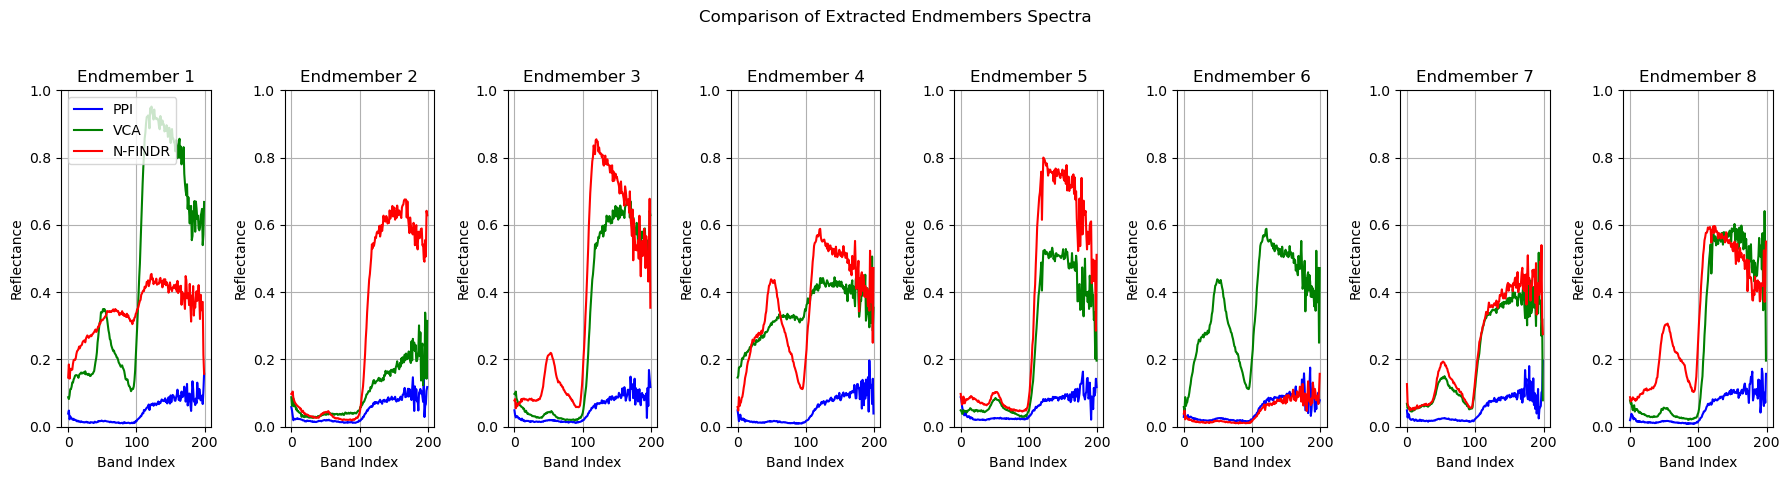

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


ppi_endmembers = np.load(r'C:\Users\raaya\OneDrive\Desktop\Hyperspectular\Assignment\ppi_endmembers\MJK_N_patch_101_10_1_ppi_endmembers_original.npy')
vca_endmembers = np.load(r'C:\Users\raaya\OneDrive\Desktop\Hyperspectular\Assignment\vca_endmember\MJK_N_patch_101_10_1_vca_endmembers_original.npy')
nfindr_endmembers = np.load(r'C:\Users\raaya\OneDrive\Desktop\Hyperspectular\Assignment\NFinder_endmember\MJK_N_patch_101_10_1_nfindr_endmembers_original.npy')



def spectral_angle_distance(A, B):
 
    A_norm = A / np.linalg.norm(A, axis=1, keepdims=True)
    B_norm = B / np.linalg.norm(B, axis=1, keepdims=True)
    cos_theta = np.sum(A_norm * B_norm, axis=1)
    cos_theta = np.clip(cos_theta, -1, 1) 
    angles = np.arccos(cos_theta)
    return np.degrees(np.mean(angles))

def rmse(original_spectra, endmembers):
    errors = []
    for spectrum in original_spectra:
        distances = np.linalg.norm(endmembers - spectrum, axis=1)
        closest = endmembers[np.argmin(distances)]
        rmse = np.sqrt(np.mean((spectrum - closest) ** 2))
        errors.append(rmse)
    return np.mean(errors)

original_data = np.load(r'C:\Users\raaya\Downloads\Test\rs\MJK_N_patch_101_10_1.npy')  
h, w, bands = original_data.shape
original_reshaped = original_data.reshape(-1, bands) 

sad_ppi_vca = spectral_angle_distance(ppi_endmembers, vca_endmembers)
sad_ppi_nfindr = spectral_angle_distance(ppi_endmembers, nfindr_endmembers)
sad_vca_nfindr = spectral_angle_distance(vca_endmembers, nfindr_endmembers)

rmse_ppi = rmse(original_reshaped, ppi_endmembers)
rmse_vca = rmse(original_reshaped, vca_endmembers)
rmse_nfindr = rmse(original_reshaped, nfindr_endmembers)

print("Spectral Angle Distance (°) between methods:")
print(f"PPI vs VCA   : {sad_ppi_vca:.4f}")
print(f"PPI vs N-FINDR: {sad_ppi_nfindr:.4f}")
print(f"VCA vs N-FINDR: {sad_vca_nfindr:.4f}\n")
print("Reconstruction RMSE for each method:")
print(f"PPI    : {rmse_ppi:.6f}")
print(f"VCA    : {rmse_vca:.6f}")
print(f"N-FINDR: {rmse_nfindr:.6f}")


num_endmembers = ppi_endmembers.shape[0]
bands = ppi_endmembers.shape[1]

plt.figure(figsize=(18, 5))

for i in range(num_endmembers):
    plt.subplot(1, num_endmembers, i+1)
    plt.plot(ppi_endmembers[i], label='PPI', color='blue')
    plt.plot(vca_endmembers[i], label='VCA', color='green')
    plt.plot(nfindr_endmembers[i], label='N-FINDR', color='red')
    plt.title(f'Endmember {i+1}')
    plt.xlabel('Band Index')
    plt.ylabel('Reflectance')
    plt.ylim(0, 1)
    if i == 0:
        plt.legend()
    plt.grid(True)
plt.suptitle('Comparison of Extracted Endmembers Spectra')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [18]:
import numpy as np
import matplotlib.pyplot as plt

def spectral_angle_distance(A, B):
    A_norm = A / np.linalg.norm(A, axis=1, keepdims=True)
    B_norm = B / np.linalg.norm(B, axis=1, keepdims=True)
    cos_theta = np.sum(A_norm * B_norm, axis=1)
    cos_theta = np.clip(cos_theta, -1, 1)
    angles = np.arccos(cos_theta)
    return np.degrees(np.mean(angles))

def rmse(data, endmembers):
    errors = []
    for spectrum in data:
        distances = np.linalg.norm(endmembers - spectrum, axis=1)
        closest = endmembers[np.argmin(distances)]
        error = np.sqrt(np.mean((spectrum - closest) ** 2))
        errors.append(error)
    return np.mean(errors)

pca_data = np.load(r'C:\Users\raaya\OneDrive\Desktop\Hyperspectular\Assignment\MJK_N_patch_101_10_1.npy')
h, w, pca_bands = pca_data.shape
pca_reshaped = pca_data.reshape(-1, pca_bands)

vca_pca = np.load(r'C:\Users\raaya\OneDrive\Desktop\Hyperspectular\Assignment\vca_endmember\MJK_N_patch_101_10_1_vca_endmembers_pca.npy')
ppi_pca = np.load(r'C:\Users\raaya\OneDrive\Desktop\Hyperspectular\Assignment\ppi_endmembers\MJK_N_patch_101_10_1_ppi_endmembers_pca.npy')
nfindr_pca = np.load(r'C:\Users\raaya\OneDrive\Desktop\Hyperspectular\Assignment\NFinder_endmember\MJK_N_patch_101_10_1_nfindr_endmembers_pca.npy')

sad_ppi_vca_pca = spectral_angle_distance(ppi_pca, vca_pca)
sad_ppi_nfindr_pca = spectral_angle_distance(ppi_pca, nfindr_pca)
sad_vca_nfindr_pca = spectral_angle_distance(vca_pca, nfindr_pca)

rmse_ppi_pca = rmse(pca_reshaped, ppi_pca)
rmse_vca_pca = rmse(pca_reshaped, vca_pca)
rmse_nfindr_pca = rmse(pca_reshaped, nfindr_pca)

print("Spectral Angle Distance (°) between methods (PCA space):")
print(f"PPI vs VCA    : {sad_ppi_vca_pca:.4f}")
print(f"PPI vs N-FINDR: {sad_ppi_nfindr_pca:.4f}")
print(f"VCA vs N-FINDR: {sad_vca_nfindr_pca:.4f}\n")

print("RMSE for each method (PCA space):")
print(f"PPI    : {rmse_ppi_pca:.6f}")
print(f"VCA    : {rmse_vca_pca:.6f}")
print(f"N-FINDR: {rmse_nfindr_pca:.6f}")


Spectral Angle Distance (°) between methods (PCA space):
PPI vs VCA    : 103.2123
PPI vs N-FINDR: 111.0987
VCA vs N-FINDR: 75.8063

RMSE for each method (PCA space):
PPI    : 0.602822
VCA    : 0.141083
N-FINDR: 0.179917
